In [2]:
library(markovchain)

Warning message:
"package 'markovchain' was built under R version 4.3.1"
Package:  markovchain
Version:  0.9.5
Date:     2023-09-24 09:20:02 UTC
BugReport: https://github.com/spedygiorgio/markovchain/issues




In [40]:
# cargamos los estados
estados = c("000-000","001-030","031-060","061-090","091-120","121-150","Mayor a 150")

In [41]:
# cargamps la matriz de cada fila por rango de tiempo semestral
ps = matrix(c(0.983399623,0.003940022,0.003902676,0.002763617,0.00356656,0.002203425,0.000224077,
0.566502463,0.066502463,0.068965517,0.02955665,0.02955665,0.017241379,0.221674877,
0.403908795,0.058631922,0.078175896,0.058631922,0.042345277,0.022801303,0.335504886,
0.372881356,0.016949153,0.021186441,0.016949153,0.021186441,0.050847458,0.5,
0.219858156,0.028368794,0.007092199,0,0,0.028368794,0.716312057,
0.17721519,0.018987342,0,0.006329114,0.006329114,0.025316456,0.765822785,
0.067690831,0.000960154,0,0.000480077,0,0,0.930868939),nrow = 7 , byrow = TRUE, dimnames = list(estados,estados))

In [6]:
#Elaboramos la matriz de transicion semestral
mcs <- new("markovchain",transitionMatrix=ps,states=estados,name="Cadena Markov")
mcs

Cadena Markov 
 A  7 - dimensional discrete Markov Chain defined by the following states: 
 000-000, 001-030, 031-060, 061-090, 091-120, 121-150, Mayor a 150 
 The transition matrix  (by rows)  is defined as follows: 
               000-000     001-030     031-060     061-090     091-120
000-000     0.98339962 0.003940022 0.003902676 0.002763617 0.003566560
001-030     0.56650246 0.066502463 0.068965517 0.029556650 0.029556650
031-060     0.40390879 0.058631922 0.078175896 0.058631922 0.042345277
061-090     0.37288136 0.016949153 0.021186441 0.016949153 0.021186441
091-120     0.21985816 0.028368794 0.007092199 0.000000000 0.000000000
121-150     0.17721519 0.018987342 0.000000000 0.006329114 0.006329114
Mayor a 150 0.06769083 0.000960154 0.000000000 0.000480077 0.000000000
                121-150 Mayor a 150
000-000     0.002203425 0.000224077
001-030     0.017241379 0.221674877
031-060     0.022801303 0.335504886
061-090     0.050847458 0.500000000
091-120     0.028368794 0.71631205

In [10]:
# resumen de la matriz
# recurrentClasses(mcs)
# canonicForm(mcs)
summary(mcs)

Cadena Markov  Markov chain that is composed by: 
Closed classes: 
000-000 001-030 031-060 061-090 091-120 121-150 Mayor a 150 
Recurrent classes: 
{000-000,001-030,031-060,061-090,091-120,121-150,Mayor a 150}
Transient classes: 
NONE 
The Markov chain is irreducible 
The absorbing states are: NONE


### Podemos decir que es irreducible dado que todos los estados se comunican entre si 
### con 7 estados , y recurrente y no transistente

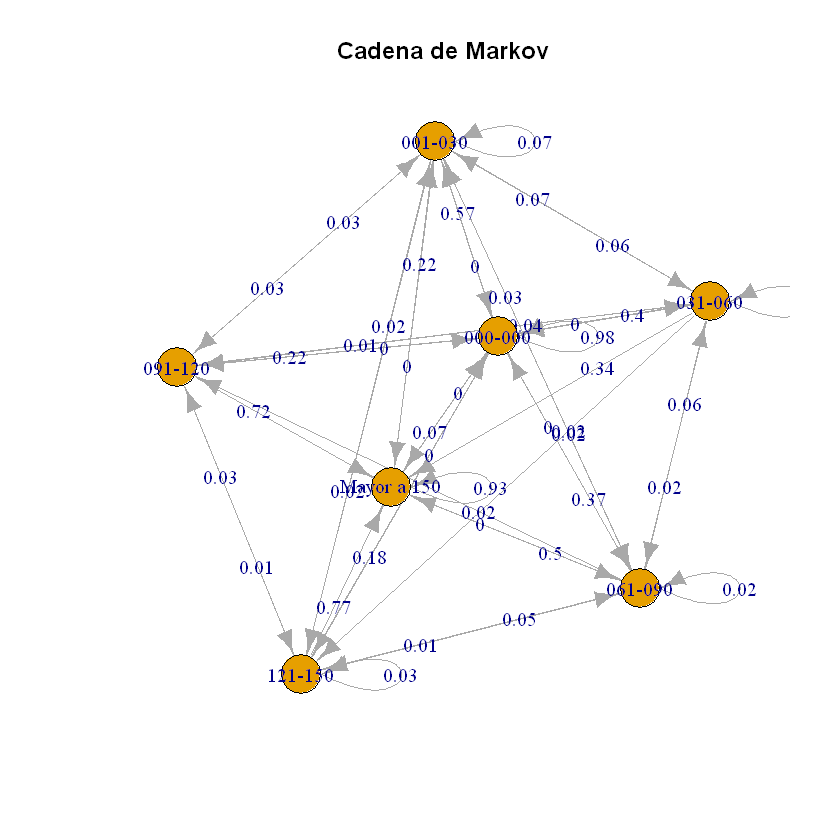

In [11]:
# Graficamos la matriz
plot(mcs,main="Cadena de Markov")

### Podemos ver los nodos representados, asi como las probabilidades de transicion entre nodos

In [16]:
#compomentes individulaes
#compomentes individulaes
absorbingStates(mcs)
transientStates(mcs)
recurrentClasses(mcs)

character(0)

character(0)

[[1]]
[1] "000-000"     "001-030"     "031-060"     "061-090"     "091-120"    
[6] "121-150"     "Mayor a 150"

### No tiene estados absorventes , ni transitoria , pero si es recurrente entre los estados

## Validacion de probabilidades entre transiciones

In [18]:
# podemos calcular las probabilidades de transicion para un estado t0 a t1 , en este caso como son datos de financera se quiere mirar la probabilidad
# de que entre a ICV a un paso , en este caso semestral
t0 = "001-030"
t1 = "031-060"

transitionProbability(object = mcs, t0 = t0, t1 = t1) * 100

[1] 6.896552

### Podemos ver que la probabilidad para entrar a cartera vencida esta con un 6.89% dado que inicio en el estado 001-030 para un paso "semestral"

## Calculamos a 2 pasos la matriz , simprelente potenciamos la matriz a los n pasos sugeridos

In [21]:
n = 2
msc_n = mcs^n ; msc_n

Cadena Markov^2 
 A  7 - dimensional discrete Markov Chain defined by the following states: 
 000-000, 001-030, 031-060, 061-090, 091-120, 121-150, Mayor a 150 
 The transition matrix  (by rows)  is defined as follows: 
              000-000     001-030     031-060      061-090      091-120
000-000     0.9731035 0.004555531 0.004498557 0.0031239094 0.0038615644
001-030     0.6582081 0.012577847 0.013024515 0.0082912705 0.0076417418
031-060     0.5199189 0.013024298 0.013273900 0.0087319571 0.0078704219
061-090     0.4386849 0.006172366 0.004789762 0.0036227948 0.0034089212
091-120     0.2886592 0.004395088 0.003368943 0.0023853538 0.0021024943
121-150     0.2451069 0.003463759 0.002180064 0.0016861149 0.0014875730
Mayor a 150 0.1303014 0.001232470 0.000340564 0.0006704761 0.0002799735
                 121-150 Mayor a 150
000-000     0.0026212496 0.008235726
001-030     0.0067452012 0.293511342
031-060     0.0084432070 0.428737354
061-090     0.0043470539 0.538974201
091-120     0.00185

### Calculamos de nuevo la probabilidad de entrar a ICV en 2 pasos

In [24]:
t0 = "001-030"
t1 = "031-060"

transitionProbability(object = msc_n, t0 = t0, t1 = t1) * 100

[1] 1.302452

### Podemos ver que a 2 pasos " 2 años " la probabilidad de entrar a ICV aumenta al 1.30% 
### cuando n va a infinito la matriz ya se mantiene estable

In [34]:
# Calculo probabilidad del primer paso para el conjunto de estado completo
mcs_n1<-as(mcs, "markovchain")
firstPassage(mcs_n1, "001-030",2)

,000-000,001-030,031-060,061-090,091-120,121-150,Mayor a 150
1,0.5665025,0.06650246,0.068965517,0.02955665,0.029556650,0.017241379,0.22167488
2,0.1011098,0.00815527,0.007633074,0.00779031,0.007641742,0.006308711,0.08716108


## Comprobacion de estacionariedad

In [25]:
# distribucion estacionaria de la cadena
distEst = steadyStates(mcs) ; distEst

000-000,001-030,031-060,061-090,091-120,121-150,Mayor a 150
0.8640343,0.004230069,0.004067075,0.002872164,0.003454752,0.002373643,0.118968


## Comparacion matriz con tiempo anual

In [42]:
# cargamps la matriz de cada fila por rango de tiempo semestral
psa = matrix(c(0.972061009,0.004158115,0.004281973,0.003043386,0.003698068,0.002406398,0.010351051,
0.823019802,0.021039604,0.017326733,0.006188119,0.006188119,0.003712871,0.122524752,
0.401015228,0.030456853,0.025380711,0.010152284,0.010152284,0.030456853,0.492385787,
0.296551724,0.027586207,0.013793103,0.013793103,0.020689655,0.027586207,0.6,
0.198275862,0.00862069,0.00862069,0.017241379,0.00862069,0.00862069,0.75,
0.313953488,0,0.034883721,0,0,0,0.651162791,
0.109243697,0.003601441,0,0.00060024,0.00120048,0.00120048,0.884153661),nrow = 7 , byrow = TRUE, dimnames = list(estados,estados))

In [46]:
#Elaboramos la matriz de transicion semestral
mcsa <- new("markovchain",transitionMatrix=psa,states=estados,name="Cadena Markov")
mcsa

Cadena Markov 
 A  7 - dimensional discrete Markov Chain defined by the following states: 
 000-000, 001-030, 031-060, 061-090, 091-120, 121-150, Mayor a 150 
 The transition matrix  (by rows)  is defined as follows: 
              000-000     001-030     031-060     061-090     091-120
000-000     0.9720610 0.004158115 0.004281973 0.003043386 0.003698068
001-030     0.8230198 0.021039604 0.017326733 0.006188119 0.006188119
031-060     0.4010152 0.030456853 0.025380711 0.010152284 0.010152284
061-090     0.2965517 0.027586207 0.013793103 0.013793103 0.020689655
091-120     0.1982759 0.008620690 0.008620690 0.017241379 0.008620690
121-150     0.3139535 0.000000000 0.034883721 0.000000000 0.000000000
Mayor a 150 0.1092437 0.003601441 0.000000000 0.000600240 0.001200480
                121-150 Mayor a 150
000-000     0.002406398  0.01035105
001-030     0.003712871  0.12252475
031-060     0.030456853  0.49238579
061-090     0.027586207  0.60000000
091-120     0.008620690  0.75000000
121-15

In [47]:
# resumen de la matriz
# recurrentClasses(mcs)
# canonicForm(mcs)
summary(mcsa)

Cadena Markov  Markov chain that is composed by: 
Closed classes: 
000-000 001-030 031-060 061-090 091-120 121-150 Mayor a 150 
Recurrent classes: 
{000-000,001-030,031-060,061-090,091-120,121-150,Mayor a 150}
Transient classes: 
NONE 
The Markov chain is irreducible 
The absorbing states are: NONE


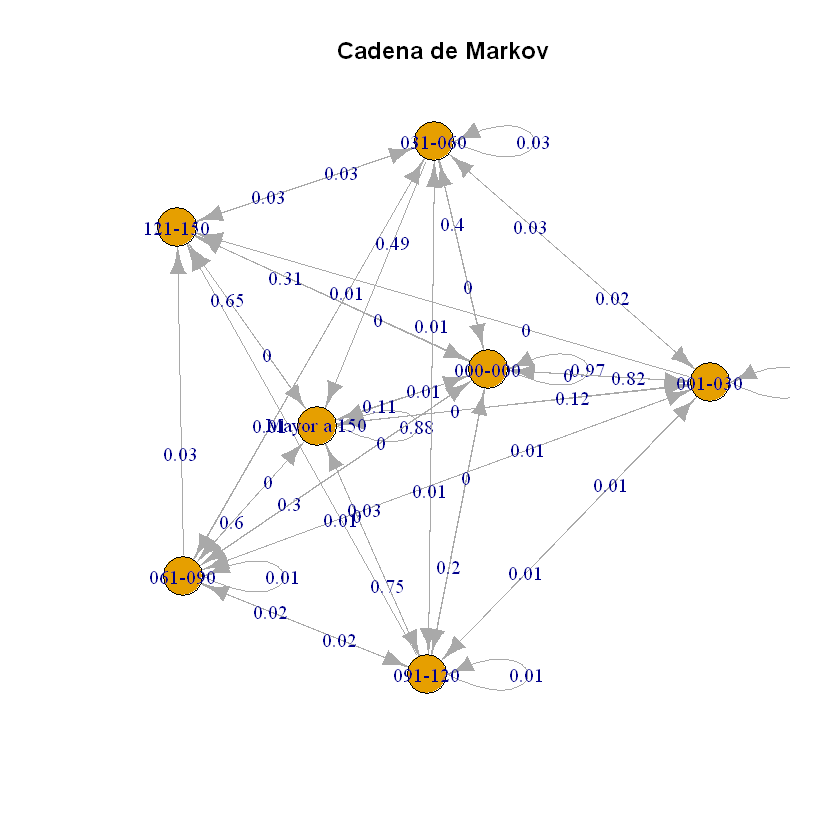

In [48]:
# Graficamos la matriz
plot(mcsa,main="Cadena de Markov")

In [49]:
# podemos calcular las probabilidades de transicion para un estado t0 a t1 , en este caso como son datos de financera se quiere mirar la probabilidad
# de que entre a ICV a un paso , en este caso anual
t0 = "001-030"
t1 = "031-060"

transitionProbability(object = mcsa, t0 = t0, t1 = t1) * 100

[1] 1.732673

### Podemos ver que al comparar la semestral vs la anual , la probabilidad de entrar en cartera vencida es 0.43% mas alto que la semestralcon 2 pasos con 1.73%

## Calculamos el paso 2 de la anual , para comparar con la semestral

In [50]:
na = 2
msc_na = mcsa^na ; msc_na

Cadena Markov^2 
 A  7 - dimensional discrete Markov Chain defined by the following states: 
 000-000, 001-030, 031-060, 061-090, 091-120, 121-150, Mayor a 150 
 The transition matrix  (by rows)  is defined as follows: 
              000-000     001-030      031-060      061-090     091-120
000-000     0.9535640 0.004412956 0.0045008668 0.0031395102 0.003771223
001-030     0.8419025 0.005057912 0.0045966789 0.0030764578 0.003678149
031-060     0.4934316 0.005222165 0.0041790342 0.0022772075 0.002817791
061-090     0.3989012 0.004953317 0.0034288024 0.0021203715 0.002591428
091-120     0.2947498 0.004519410 0.0018300297 0.0015809202 0.002205498
121-150     0.3903063 0.004713027 0.0022297140 0.0017004850 0.002296879
Mayor a 150 0.2065367 0.003741155 0.0005906851 0.0009144384 0.001510453
                121-150 Mayor a 150
000-000     0.002613281  0.02799817
001-030     0.002957489  0.13873078
031-060     0.002809783  0.48926240
061-090     0.002515287  0.58548955
091-120     0.002221998 

In [51]:
t0 = "001-030"
t1 = "031-060"

transitionProbability(object = msc_na, t0 = t0, t1 = t1) * 100

[1] 0.4596679

In [57]:
# Calculo probabilidad del primer paso para el conjunto de estado completo
mcsa_n1<-as(mcsa, "markovchain")
firstPassage(mcsa_n1, "001-030",2)

,000-000,001-030,031-060,061-090,091-120,121-150,Mayor a 150
1,0.82301980,0.021039604,0.017326733,0.006188119,0.006188119,0.003712871,0.12252475
2,0.04187707,0.004615247,0.004156914,0.002991104,0.003624803,0.002957489,0.03040007


### A partir de estos podemos calcular las porbilidades de incumplimiento para cada estado, la tasa de recuperacion